SGD(Stochastic Gradient Descent) :  확률적 경사하강법
  - 1. 전체데이터에서 임의의 샘플을 추출( 배치)
  - 2. 선택한 샘플 데이터를 이용해서 손실 함수의 기울기(경사)를 계산한다
  - 3. 계산된 기울기를 이용해서 파라메터를 조정, 이때 학습률(learning late)도 조정
  - 4. 위 단계를 반복한다.( 모들샘플을 사용하거나 일정한 반복횟수에 도달할때 까지)
  - 반복횟수 : epoch

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20231211/python/main/data/logistic_data.csv')
df.head()

,Target,Weight,Length,Diagonal,Height,Width
0,a,242.0,25.4,30.0,11.5200,4.0200
1,a,290.0,26.3,31.2,12.4800,4.3056
2,a,340.0,26.5,31.1,12.3778,4.6961
3,a,363.0,29.0,33.5,12.7300,4.4555
4,a,430.0,29.0,34.0,12.4440,5.1340


In [6]:
# 데이터전처리(표준화), 데이터 분리(학습용, 테스트용)
X = df.iloc[:,1:].to_numpy()
y = df['Target'].to_numpy()

In [7]:
X[:5], y[:5]

(array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
        [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
        [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
        [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
        [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]]),
 array(['a', 'a', 'a', 'a', 'a'], dtype=object))

In [9]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test =  train_test_split(X_scaled,y,stratify = y,random_state=80)

In [15]:
from sklearn.linear_model import SGDClassifier

In [24]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)
sgd.score(X_train, y_train), sgd.score(X_test, y_test)

(0.8991596638655462, 0.85)

In [25]:
sgd = SGDClassifier(loss='log_loss')
sgd.fit(X_train,y_train)
sgd.score(X_train, y_train), sgd.score(X_test, y_test)

(0.8151260504201681, 0.75)

300번 반복학습
  - 모델을 여러번 훈련하고 평가하는걸 반복
  - partial_fit()  

In [41]:
import numpy as np
sgd = SGDClassifier(loss='log_loss',random_state=42,tol=None)
train_score, test_score = [],[]
classes = np.unique(y)

for _ in range(300):
    sgd.partial_fit(X_train,y_train,classes=classes)
    train_score.append(sgd.score(X_train,y_train))
    test_score.append(sgd.score(X_test,y_test))


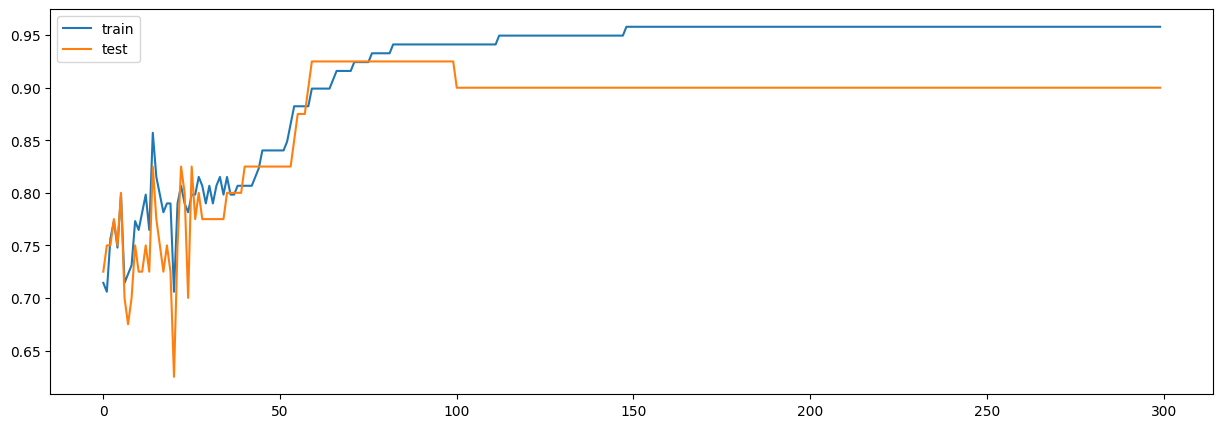

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(train_score,label='train')
plt.plot(test_score,label='test')
plt.legend()
plt.show()

In [45]:
sgd = SGDClassifier(loss='log_loss',random_state=42,tol=None,max_iter=100)  # tol SGD의 허용오차를 결정
sgd.fit(X_train,y_train)
sgd.score(X_train,y_train), sgd.score(X_test,y_test)

(0.9243697478991597, 0.875)

붓꽃 데이터 ,SGD 모델

In [46]:
from sklearn.datasets import load_iris
X = load_iris().data
y = load_iris().target

In [47]:
X_scaled = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

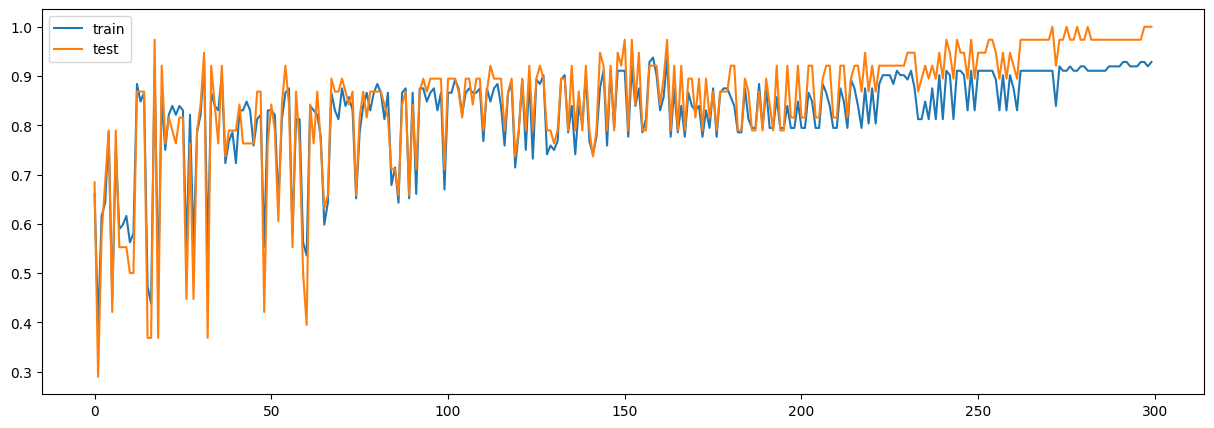

In [53]:
sgd = SGDClassifier(loss='log_loss',random_state=42,tol=None)  # log_loss를 사용하면 손실함수로 로지스틱 함수  , 반복학습할때는 오차를 어느정도 허용해서 최적의 상태에 도달할수 있도록 한다.
train_score, test_score = [], []
classes = np.unique(y)
for _ in range(300):
  sgd.partial_fit(X_train,y_train,classes=classes)
  train_score.append( sgd.score(X_train,y_train) )
  test_score.append(  sgd.score(X_test,y_test) )

plt.figure(figsize=(15,5))
plt.plot(train_score,label='train')
plt.plot(test_score,label='test')
plt.legend()
plt.show()

In [74]:
sgd = SGDClassifier(loss='log_loss',random_state=42,tol=None,max_iter=260,penalty='l1',early_stopping=True)
sgd.fit(X_train,y_train)
sgd.score(X_train,y_train), sgd.score(X_test, y_test)

(0.9553571428571429, 0.9210526315789473)

In [ ]:
sgd.get_params()